# RERUN NEEDED

# 0. Introduction

Generative classifiers model the joint distribution $$p(\mathbf{x}, y)$$
And use the Bayes rule to classify a new feature vector $\mathbf{x}$ $$p(y=c|\mathbf{x}, \mathbf{\theta}) \propto p(\mathbf{x}|y=c, \mathbf{\theta})p(y=c|\mathbf{\theta})$$
The key to using such models is specifying a suitable form for the class-conditional density $p(\mathbf{x}|y=c, \mathbf{\theta})$, and all of the following models (Gaussian Naive Bayes, LDA and QDA) make the assumption that the class-conditional density follows a multivariate normal (MVN) distribution. I.e. they make the fundamental assumption that: $$p(\mathbf{x}|y=c, \mathbf{\theta})=\mathcal{N}(\mathbf{x}|\mathbf{\mu_c}, \mathbf{\Sigma_c})$$ Where additional assumptions are made by both GNB and LDA.

- LDA further assumes that the covariance matrices between the class-conditional probabilities are shared, i.e. $\mathbf{\Sigma_c} = \mathbf{\Sigma}$

- GBN further assumes that the covariance matrices are diagonal, implying feature independence, given the class label, i.e. $$p(\mathbf{x}|y=c,\mathbf{\theta}) = \prod_{j=1}^{D} \mathcal{N}(x_j|\mu_{jc}, \sigma_{jc}^2)$$

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


import utils.datasets_utils as datasets_utils
import utils.classification_utils as classification_utils

sns.set_palette("Set2")
sns.set_style("whitegrid")

In [2]:
datasets = datasets_utils.load_datasets()
datasets_wrapper = datasets_utils.DatasetsWrapper(datasets)

The shapes of the datasets

In [3]:
datasets_wrapper.get_shapes()

,train_X,val_X,test_X,train_y,val_y,test_y
spectral_original,"(21572, 189)","(2397, 189)","(5993, 189)","(21572,)","(2397,)","(5993,)"
all_original,"(21572, 287)","(2397, 287)","(5993, 287)","(21572,)","(2397,)","(5993,)"
pca_original,"(21572, 138)","(2397, 138)","(5993, 138)","(21572,)","(2397,)","(5993,)"
umap_original,"(21572, 15)","(2397, 15)","(5993, 15)","(21572,)","(2397,)","(5993,)"
spectral_modified,"(23114, 189)","(2397, 189)","(5993, 189)","(23114,)","(2397,)","(5993,)"
all_modified,"(23114, 287)","(2397, 287)","(5993, 287)","(23114,)","(2397,)","(5993,)"
pca_modified,"(23114, 136)","(2397, 136)","(5993, 136)","(23114,)","(2397,)","(5993,)"
umap_modified,"(23114, 15)","(2397, 15)","(5993, 15)","(23114,)","(2397,)","(5993,)"


# 1. Training

In [4]:
nb_classifiers = [classification_utils.ClassifierFactory.create_instance(
    dataset=dataset, 
    classifier=GaussianNB()
) for dataset in datasets]

lda_classifiers = [classification_utils.ClassifierFactory.create_instance(
    dataset=dataset,
    classifier=LinearDiscriminantAnalysis()
) for dataset in datasets]

qda_classifiers = [classification_utils.ClassifierFactory.create_instance(
    dataset=dataset, 
    classifier=QuadraticDiscriminantAnalysis()
) for dataset in datasets]

In [5]:
nb_cl_collection = classification_utils.ClassifiersCollection(nb_classifiers)
lda_cl_collection = classification_utils.ClassifiersCollection(lda_classifiers)
qda_cl_collection = classification_utils.ClassifiersCollection(qda_classifiers)

In [6]:
nb_cl_collection.fit_classifiers()

Fitting classifiers...


100%|██████████| 8/8 [00:01<00:00,  5.88it/s]

Done


In [7]:
lda_cl_collection.fit_classifiers()

Fitting classifiers...


100%|██████████| 8/8 [00:08<00:00,  1.05s/it]

Done


In [8]:
qda_cl_collection.fit_classifiers()

Fitting classifiers...


  0%|          | 0/8 [00:00<?, ?it/s]d:\Kiril\Da Finki\6 Semestar\Податочно Рударење\PR_Labs\clone\Music-Genre-Classification\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
 12%|█▎        | 1/8 [00:02<00:14,  2.12s/it]d:\Kiril\Da Finki\6 Semestar\Податочно Рударење\PR_Labs\clone\Music-Genre-Classification\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
 25%|██▌       | 2/8 [00:05<00:17,  2.91s/it]d:\Kiril\Da Finki\6 Semestar\Податочно Рударење\PR_Labs\clone\Music-Genre-Classification\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
 38%|███▊      | 3/8 [00:06<00:11,  2.22s/it]d:\Kiril\Da Finki\6 Semestar\Податочно Рударење\PR_Labs\clone\Music-Genre-Classification\.venv\Lib\site-packages\sklearn\discriminant_a

Done


# 2. Results

## 2.1 Gaussian Naive Bayes

In [9]:
nb_evaluation_df = nb_cl_collection.evaluate_classifiers()

In [10]:
nb_evaluation_df[[dataset.name for dataset in datasets if 'original' in dataset.name]]

spectral_original                     all_original  \
                                 train       val      test        train   
accuracy                      0.422724  0.413016  0.408310     0.352355   
precision (weighted)          0.508819  0.506498  0.495661     0.525677   
recall (weighted)             0.422724  0.413016  0.408310     0.352355   
f1 (weighted)                 0.429776  0.419239  0.416972     0.386228   

                                         pca_original                      \
                           val      test        train       val      test   
accuracy              0.338757  0.345069     0.340534  0.327910  0.329217   
precision (weighted)  0.517221  0.519891     0.474313  0.464243  0.462352   
recall (weighted)     0.338757  0.345069     0.340534  0.327910  0.329217   
f1 (weighted)         0.371234  0.380122     0.376126  0.364129  0.367840   

                     umap_original                      
                             train       val      test  
accuracy                  0.454803  0.440968  0.447689  
precision (weighted)      0.401016  0.406939  0.398924  
recall (weighted)         0.454803  0.440968  0.447689  
f1 (weighted)             0.403123  0.386948  0.397433

In [11]:
nb_evaluation_df[[dataset.name for dataset in datasets if 'modified' in dataset.name]]

spectral_modified                     all_modified  \
                                 train       val      test        train   
accuracy                      0.410487  0.416771  0.409478     0.366877   
precision (weighted)          0.442625  0.510339  0.496216     0.453196   
recall (weighted)             0.410487  0.416771  0.409478     0.366877   
f1 (weighted)                 0.399475  0.431683  0.424380     0.374044   

                                         pca_modified                      \
                           val      test        train       val      test   
accuracy              0.367960  0.375772     0.338539  0.297872  0.303688   
precision (weighted)  0.504393  0.511826     0.429672  0.457689  0.465534   
recall (weighted)     0.367960  0.375772     0.338539  0.297872  0.303688   
f1 (weighted)         0.394446  0.405593     0.356287  0.334875  0.345298   

                     umap_modified                      
                             train       val      test  
accuracy                  0.388336  0.377138  0.390622  
precision (weighted)      0.370738  0.424535  0.442130  
recall (weighted)         0.388336  0.377138  0.390622  
f1 (weighted)             0.311545  0.340755  0.352158

- spectral_modified - best f1 on test
- UMAP_original     - best recall and accuracy on test
- all_modified      - best precision on test

In [12]:
nb_spectral_modified_classifier = nb_cl_collection.get_classifier('spectral_modified')
nb_umap_original_classifier = nb_cl_collection.get_classifier('umap_original')
nb_all_modified_classifier = nb_cl_collection.get_classifier('all_modified')

Results for the classifier trained on the spectral_modified dataset

In [13]:
nb_spectral_modified_classifier.get_clf_evaluation().get_scores()

,train,val,test
accuracy,0.410487,0.416771,0.409478
precision (weighted),0.442625,0.510339,0.496216
recall (weighted),0.410487,0.416771,0.409478
f1 (weighted),0.399475,0.431683,0.424380


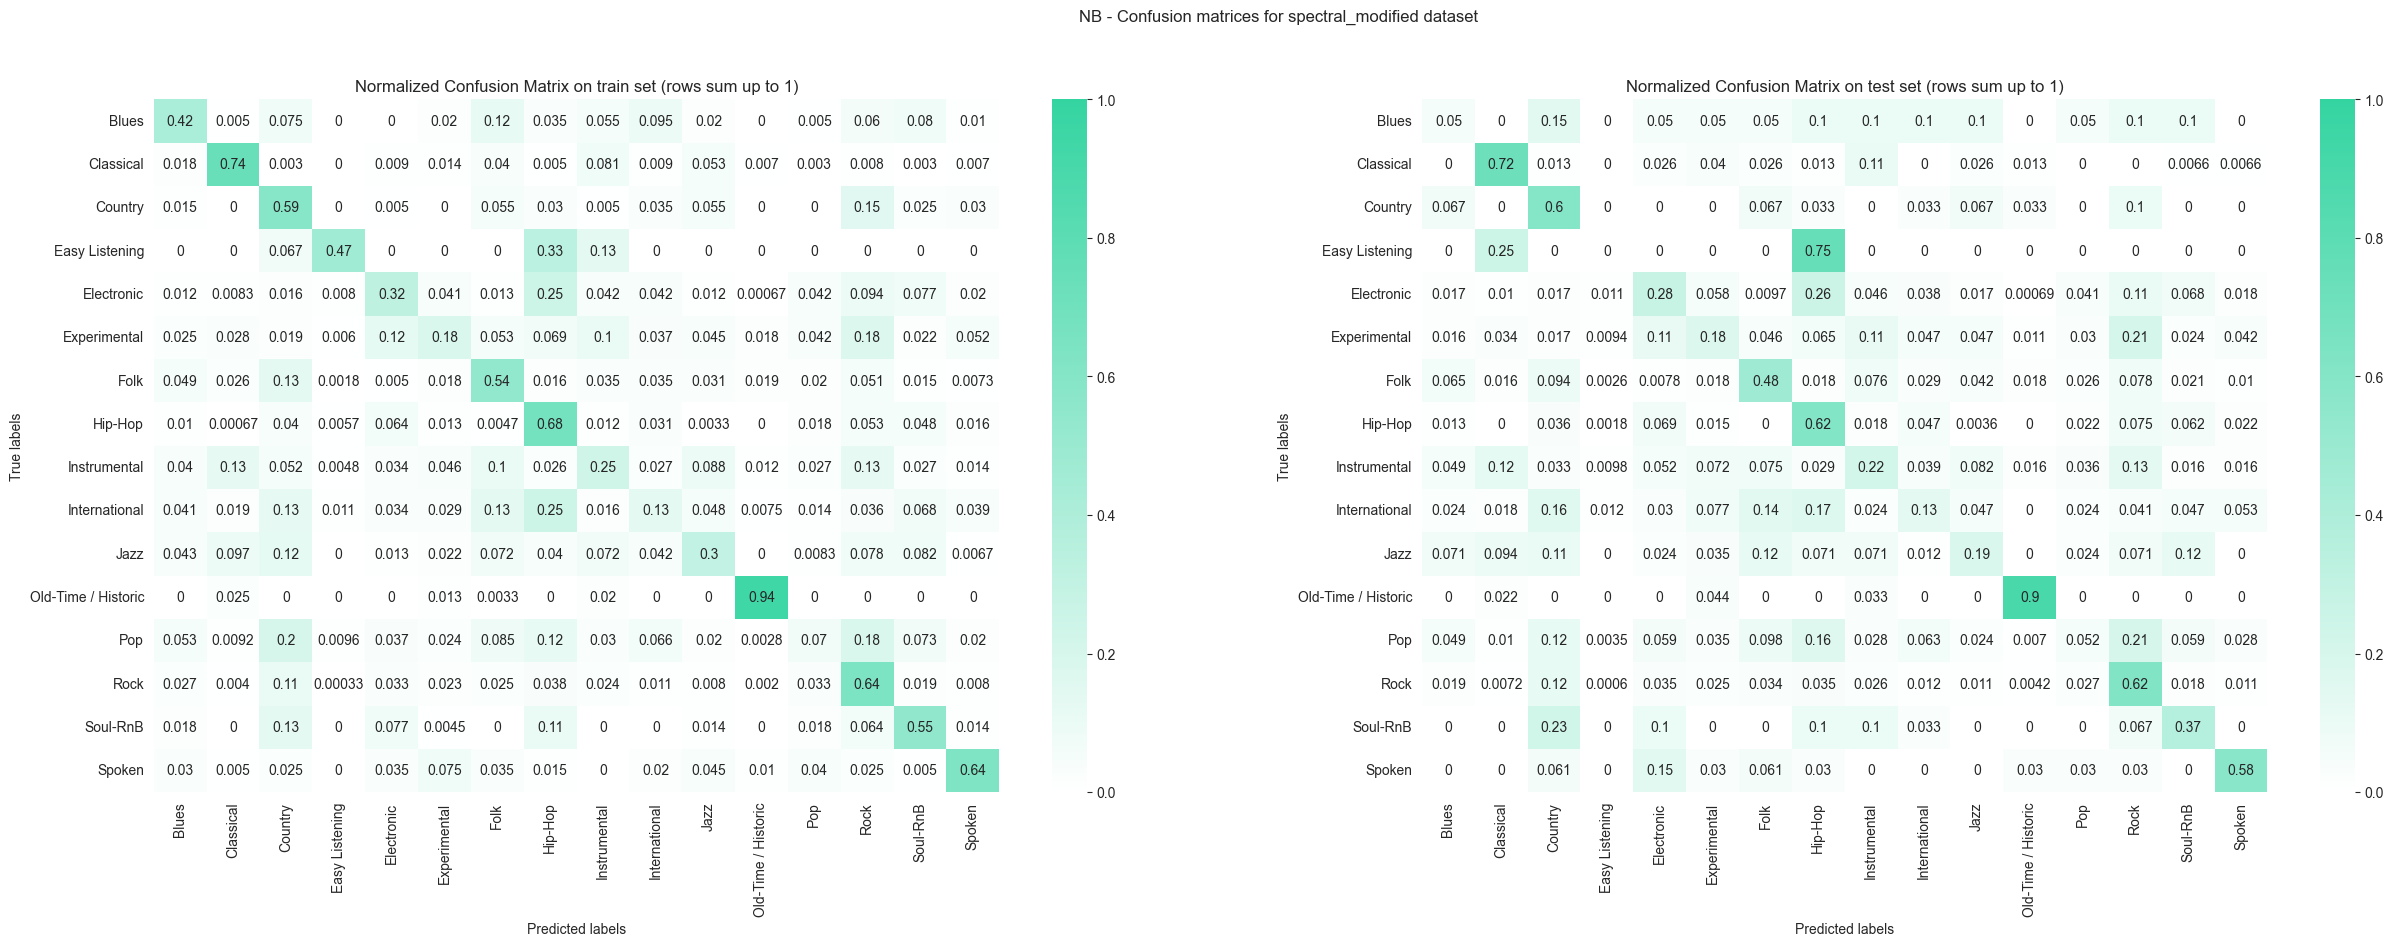

In [14]:
fig, axis = plt.subplots(1, 2, figsize=(30, 9))
nb_spectral_modified_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[0], on_set='train')
nb_spectral_modified_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[1], on_set='test')
fig.suptitle('NB - Confusion matrices for spectral_modified dataset')
plt.show()

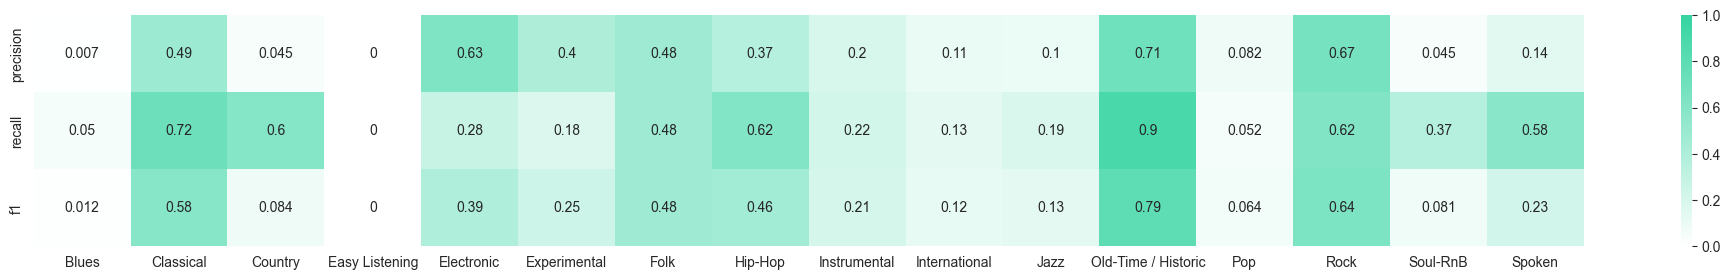

In [15]:
_, ax = plt.subplots(2, 1, figsize=(25, 3))
nb_spectral_modified_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax, on_set='train')
nb_spectral_modified_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax, on_set='test')
plt.subplots_adjust(hspace=0.5)
plt.show()

Results for the classifier trained on the umap_original dataset

In [16]:
nb_umap_original_classifier.get_clf_evaluation().get_scores()

,train,val,test
accuracy,0.454803,0.440968,0.447689
precision (weighted),0.401016,0.406939,0.398924
recall (weighted),0.454803,0.440968,0.447689
f1 (weighted),0.403123,0.386948,0.397433


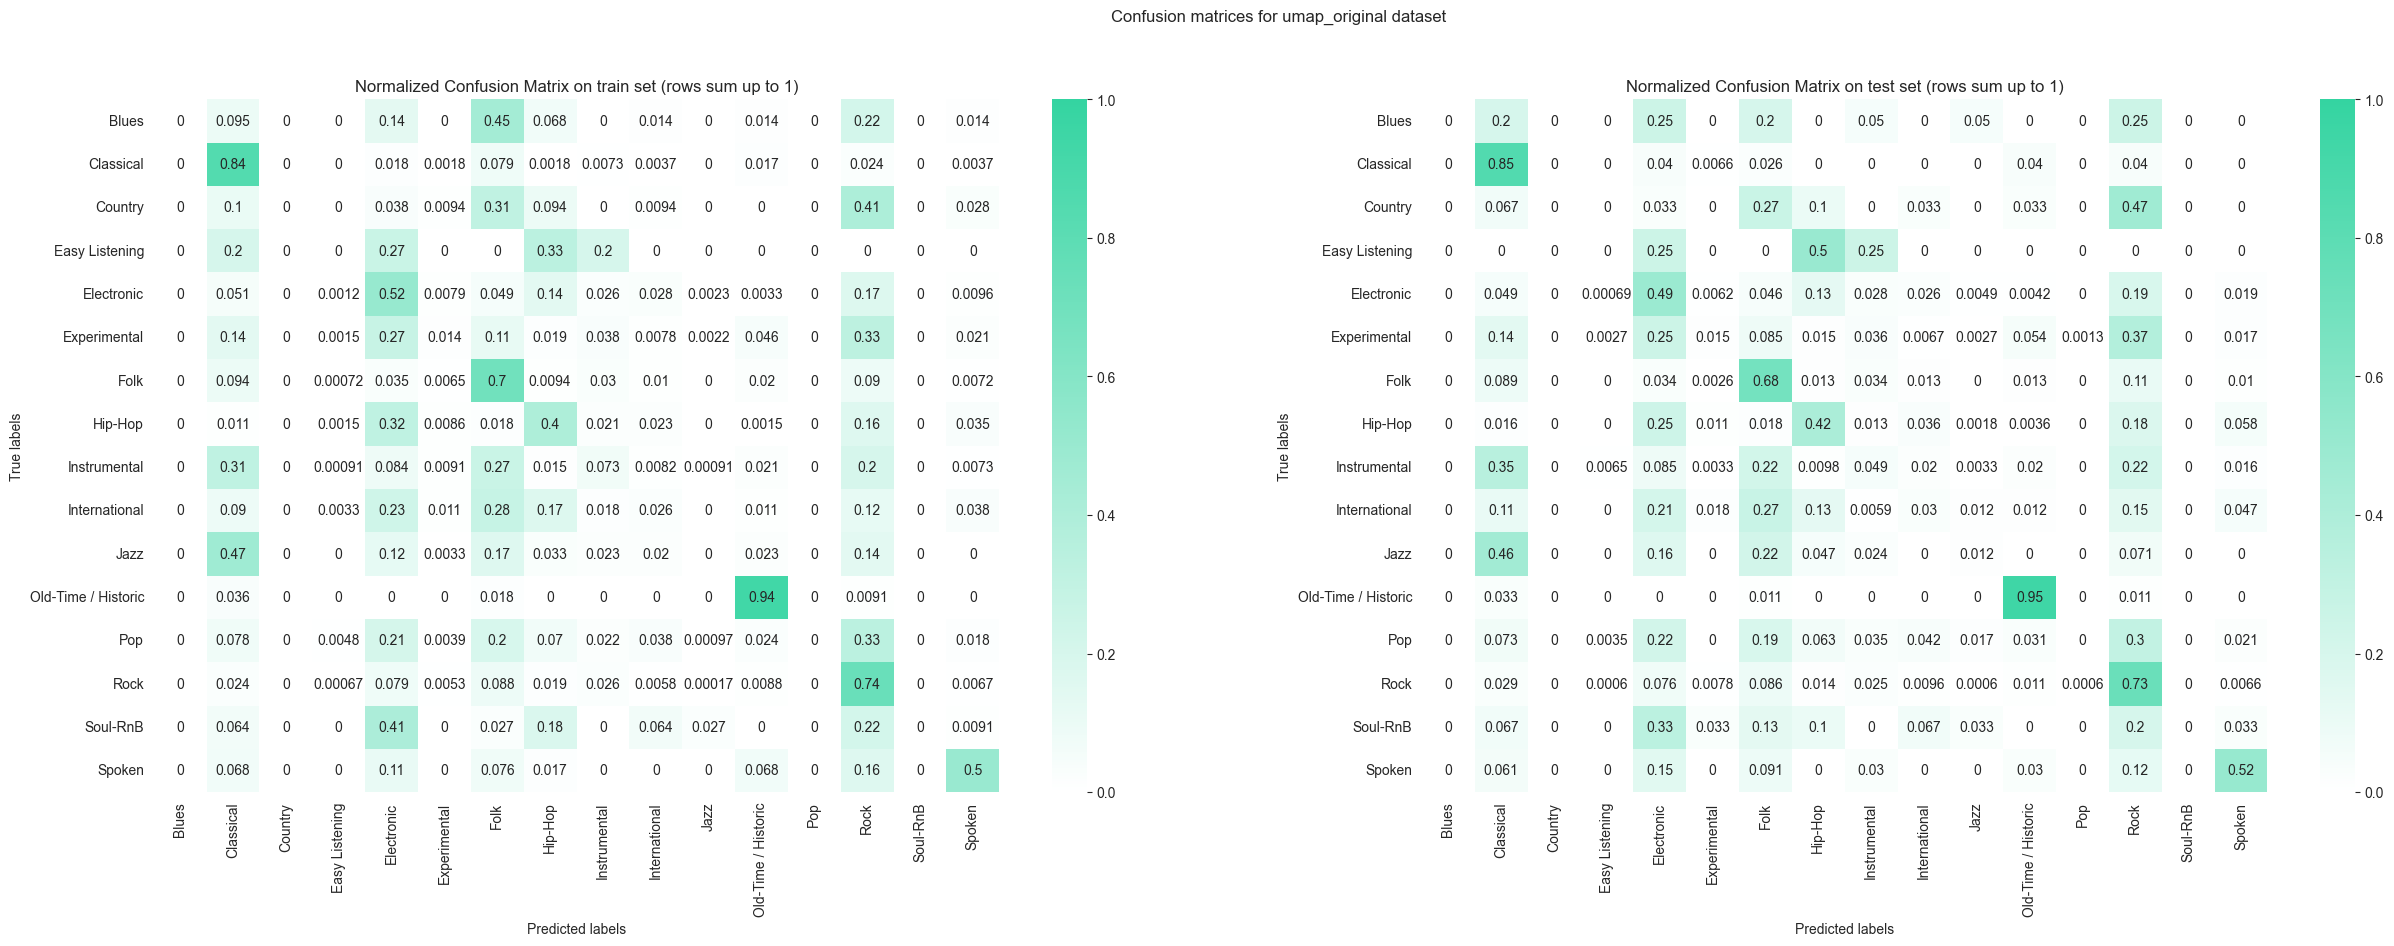

In [17]:
fig, axis = plt.subplots(1, 2, figsize=(30, 9))
nb_umap_original_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[0], on_set='train')
nb_umap_original_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[1], on_set='test')
fig.suptitle('Confusion matrices for umap_original dataset')
plt.show()

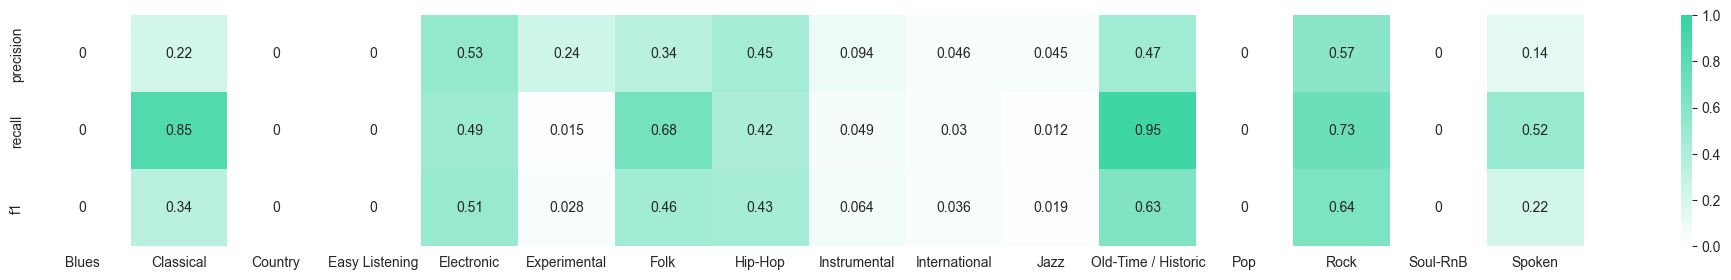

In [18]:
_, ax = plt.subplots(2, 1, figsize=(25, 3))
nb_umap_original_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax, on_set='train')
nb_umap_original_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax, on_set='test')
plt.subplots_adjust(hspace=0.5)
plt.show()

Results for the classifier trained on the all_modified dataset

In [19]:
nb_all_modified_classifier.get_clf_evaluation().get_scores()

,train,val,test
accuracy,0.366877,0.367960,0.375772
precision (weighted),0.453196,0.504393,0.511826
recall (weighted),0.366877,0.367960,0.375772
f1 (weighted),0.374044,0.394446,0.405593


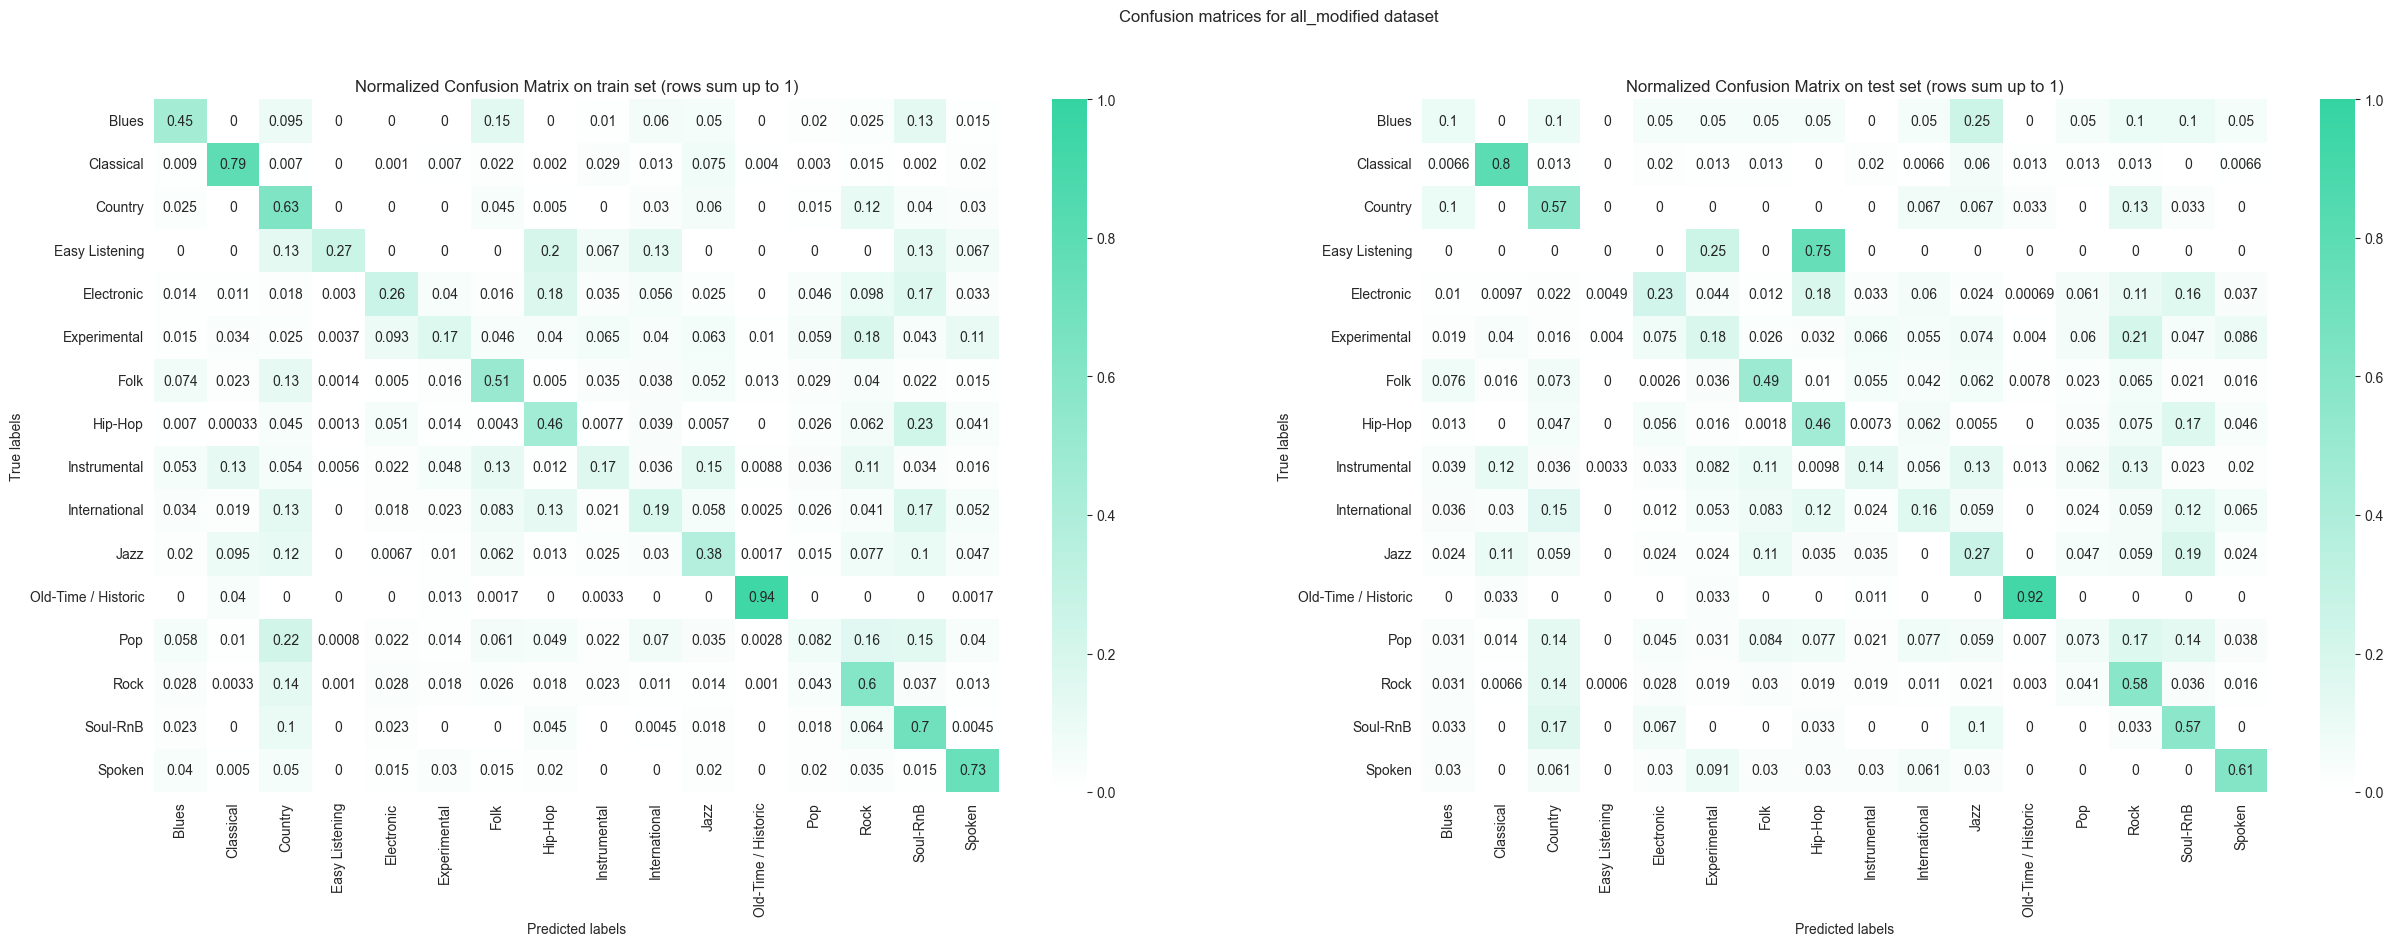

In [20]:
fig, axis = plt.subplots(1, 2, figsize=(30, 9))
nb_all_modified_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[0], on_set='train')
nb_all_modified_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[1], on_set='test')
fig.suptitle('Confusion matrices for all_modified dataset')
plt.show()

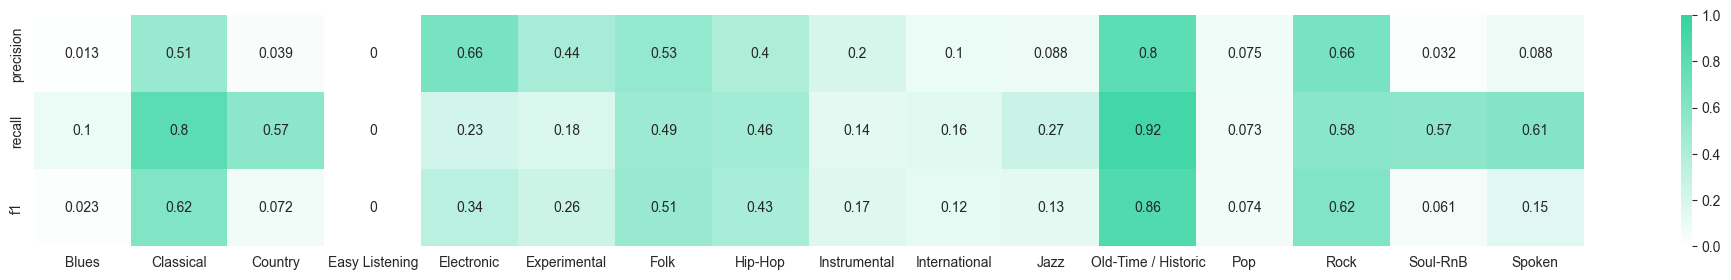

In [21]:
_, ax = plt.subplots(2, 1, figsize=(25, 3))
nb_all_modified_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax, on_set='train')
nb_all_modified_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax, on_set='test')
plt.subplots_adjust(hspace=0.5)
plt.show()

## 2.2 LDA

In [22]:
lda_evaluation_df = lda_cl_collection.evaluate_classifiers()

In [23]:
lda_evaluation_df[[dataset.name for dataset in datasets if 'original' in dataset.name]]

spectral_original                     all_original  \
                                 train       val      test        train   
accuracy                      0.621361  0.614518  0.602870     0.640970   
precision (weighted)          0.598680  0.591864  0.575375     0.623899   
recall (weighted)             0.621361  0.614518  0.602870     0.640970   
f1 (weighted)                 0.602192  0.595001  0.582449     0.627146   

                                         pca_original                      \
                           val      test        train       val      test   
accuracy              0.626617  0.620224     0.614129  0.602837  0.606541   
precision (weighted)  0.606006  0.600295     0.589937  0.579211  0.583098   
recall (weighted)     0.626617  0.620224     0.614129  0.602837  0.606541   
f1 (weighted)         0.609469  0.605051     0.593167  0.580522  0.584653   

                     umap_original                      
                             train       val      test  
accuracy                  0.519423  0.505215  0.504922  
precision (weighted)      0.481053  0.463425  0.464772  
recall (weighted)         0.519423  0.505215  0.504922  
f1 (weighted)             0.484008  0.472161  0.471191

In [24]:
lda_evaluation_df[[dataset.name for dataset in datasets if 'modified' in dataset.name]]

spectral_modified                     all_modified  \
                                 train       val      test        train   
accuracy                      0.573808  0.562370  0.542299     0.606645   
precision (weighted)          0.568564  0.611844  0.595145     0.605964   
recall (weighted)             0.573808  0.562370  0.542299     0.606645   
f1 (weighted)                 0.567575  0.575990  0.557740     0.603617   

                                         pca_modified                      \
                           val      test        train       val      test   
accuracy              0.576137  0.563491     0.563079  0.554860  0.542800   
precision (weighted)  0.627344  0.621011     0.557932  0.606359  0.593659   
recall (weighted)     0.576137  0.563491     0.563079  0.554860  0.542800   
f1 (weighted)         0.591041  0.581305     0.555166  0.567701  0.556969   

                     umap_modified                      
                             train       val      test  
accuracy                  0.440729  0.458073  0.459703  
precision (weighted)      0.403670  0.469894  0.461927  
recall (weighted)         0.440729  0.458073  0.459703  
f1 (weighted)             0.390220  0.439072  0.439354

In [25]:
lda_all_original_classifier = lda_cl_collection.get_classifier('all_original')

In [26]:
lda_all_original_classifier.get_clf_evaluation().get_scores()

,train,val,test
accuracy,0.640970,0.626617,0.620224
precision (weighted),0.623899,0.606006,0.600295
recall (weighted),0.640970,0.626617,0.620224
f1 (weighted),0.627146,0.609469,0.605051


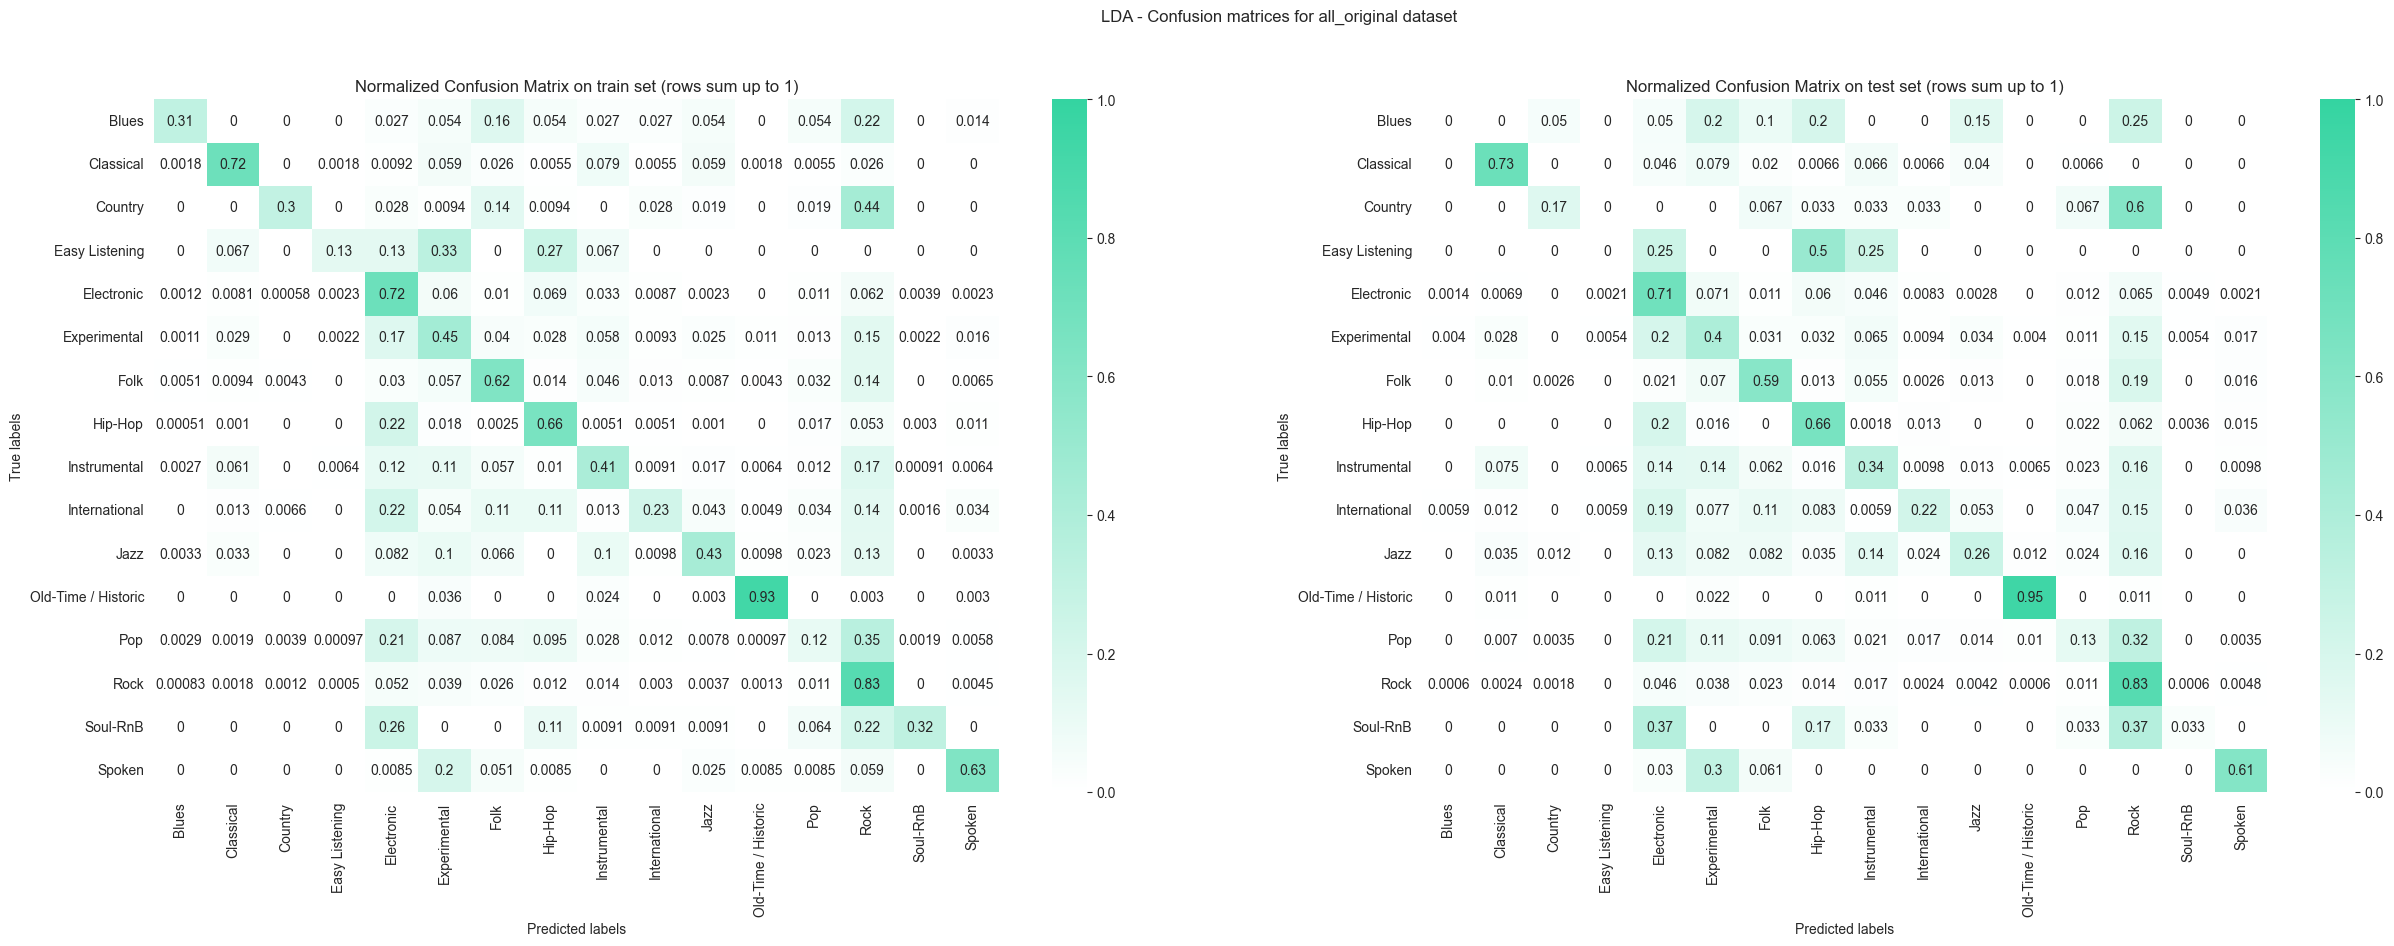

In [27]:
fig, axis = plt.subplots(1, 2, figsize=(30, 9))
lda_all_original_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[0], on_set='train')
lda_all_original_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[1], on_set='test')
fig.suptitle('LDA - Confusion matrices for all_original dataset')
plt.show()

Metrics on train set

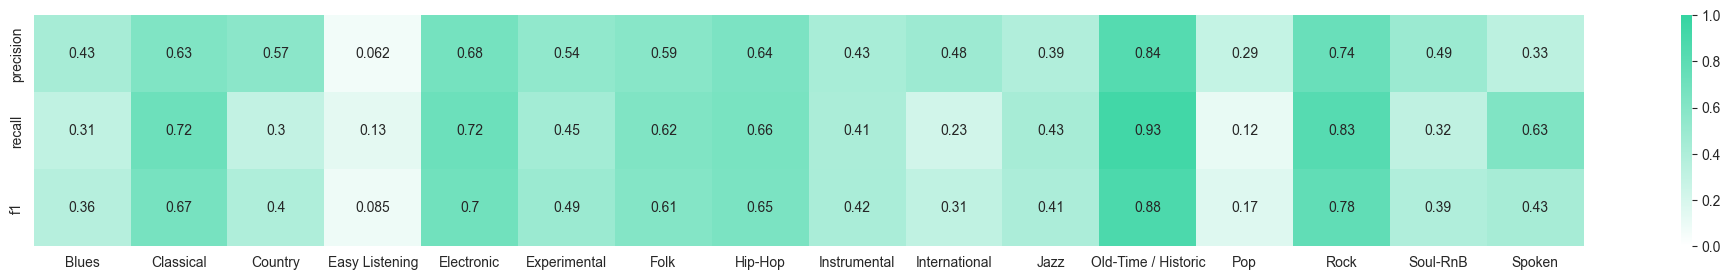

In [28]:
_, ax = plt.subplots(2, 1, figsize=(25, 3))
lda_all_original_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax, on_set='train')
lda_all_original_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax, on_set='test')
plt.subplots_adjust(hspace=0.5)
plt.show()

## 2.3 QDA

In [30]:
qda_evaluation_df = qda_cl_collection.evaluate_classifiers()

In [31]:
qda_evaluation_df[[dataset.name for dataset in datasets if 'original' in dataset.name]]

spectral_original                     all_original  \
                                 train       val      test        train   
accuracy                      0.692935  0.533166  0.512598     0.243047   
precision (weighted)          0.727139  0.540263  0.533959     0.772099   
recall (weighted)             0.692935  0.533166  0.512598     0.243047   
f1 (weighted)                 0.692467  0.521133  0.501127     0.259968   

                                         pca_original                      \
                           val      test        train       val      test   
accuracy              0.142261  0.141665     0.425413  0.307468  0.313866   
precision (weighted)  0.561149  0.560867     0.690963  0.549786  0.548020   
recall (weighted)     0.142261  0.141665     0.425413  0.307468  0.313866   
f1 (weighted)         0.144365  0.147107     0.465596  0.348397  0.359940   

                     umap_original                      
                             train       val      test  
accuracy                  0.415400  0.414268  0.424162  
precision (weighted)      0.453238  0.418408  0.432246  
recall (weighted)         0.415400  0.414268  0.424162  
f1 (weighted)             0.389372  0.388721  0.397519

In [32]:
qda_evaluation_df[[dataset.name for dataset in datasets if 'modified' in dataset.name]]

spectral_modified                     all_modified  \
                                 train       val      test        train   
accuracy                      0.773730  0.503963  0.491574     0.467768   
precision (weighted)          0.780467  0.542956  0.526309     0.769964   
recall (weighted)             0.773730  0.503963  0.491574     0.467768   
f1 (weighted)                 0.771520  0.504671  0.489202     0.474176   

                                         pca_modified                      \
                           val      test        train       val      test   
accuracy              0.201085  0.193059     0.580081  0.371297  0.370265   
precision (weighted)  0.537096  0.503051     0.674725  0.526949  0.511863   
recall (weighted)     0.201085  0.193059     0.580081  0.371297  0.370265   
f1 (weighted)         0.237433  0.228082     0.578080  0.408812  0.405161   

                     umap_modified                      
                             train       val      test  
accuracy                  0.393484  0.363788  0.368597  
precision (weighted)      0.441323  0.452476  0.449833  
recall (weighted)         0.393484  0.363788  0.368597  
f1 (weighted)             0.336779  0.344507  0.344486

So singular matrix da objasnam sho se desilo za sho se olku losi rez

In [33]:
qda_spectral_original_classifier = qda_cl_collection.get_classifier('spectral_original')

In [34]:
qda_spectral_original_classifier.get_clf_evaluation().get_scores()

,train,val,test
accuracy,0.692935,0.533166,0.512598
precision (weighted),0.727139,0.540263,0.533959
recall (weighted),0.692935,0.533166,0.512598
f1 (weighted),0.692467,0.521133,0.501127


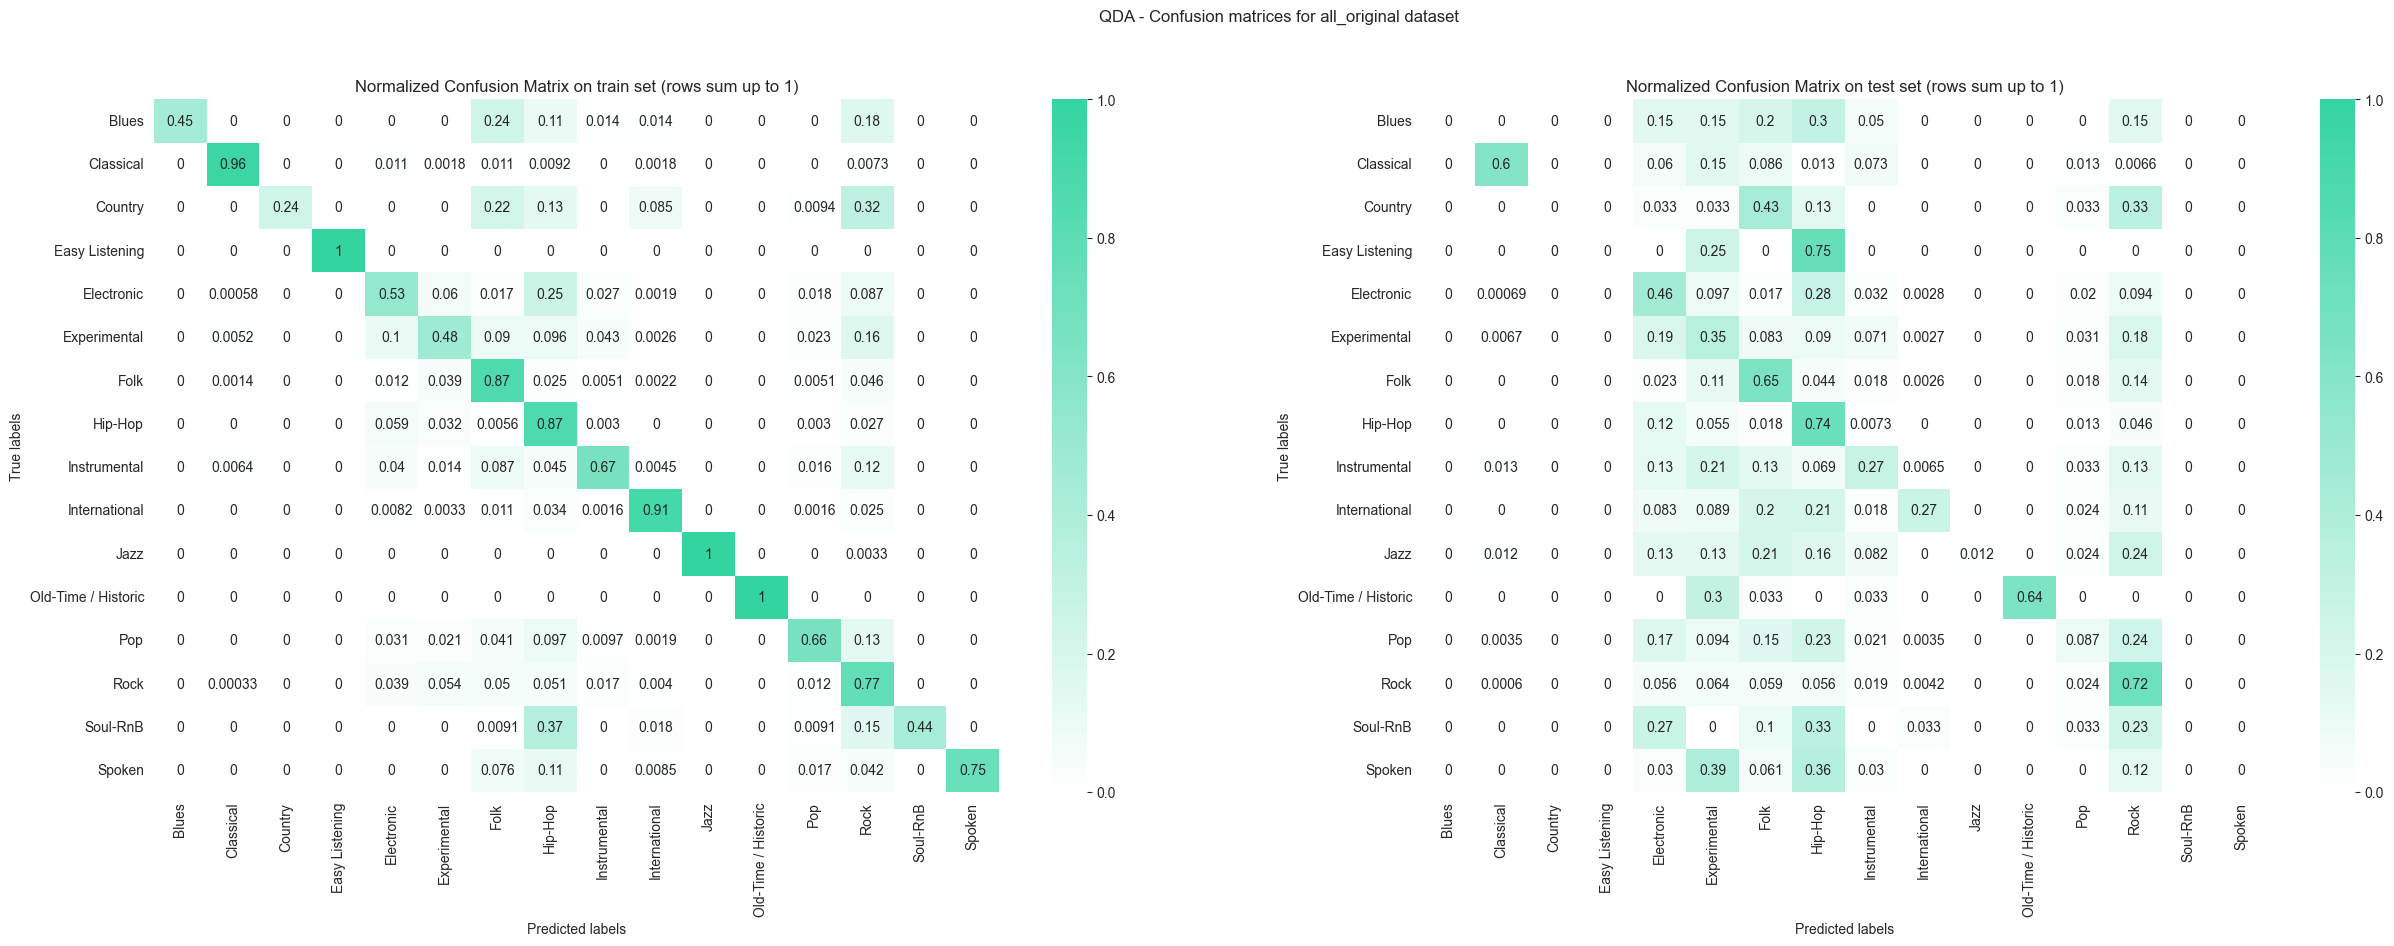

In [35]:
fig, axis = plt.subplots(1, 2, figsize=(30, 9))
qda_spectral_original_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[0], on_set='train')
qda_spectral_original_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[1], on_set='test')
fig.suptitle('QDA - Confusion matrices for all_original dataset')
plt.show()

We notice that this model **overfits** on the training data, and performs poorly on the test data. The issue is that the MLE estimates of the parameters badly overfit in high dimensions. In such cases, the MLE for a full covariance matrix (which is that QDA esitames) is usually ill-conditioned, meaning it is close to singular. There are several solutions to this problem:
- Using diagional covariance matix for each class (equivalent to using **GNB**)
- Using a full covariance matrix, but forcing it to be the same for all classes (equivalent to using **LDA**)
- Using a diagonal covariance matrix *and* forcing it to be shared
- Using a Bayesian approach by imposing a propr and then integrating it out (Bayesian naive Bayes)
- Using MAP estimates instead of MLE estimates for the parameters of the model
- Projecting the data in lower dimensions and fitting Gaussians there

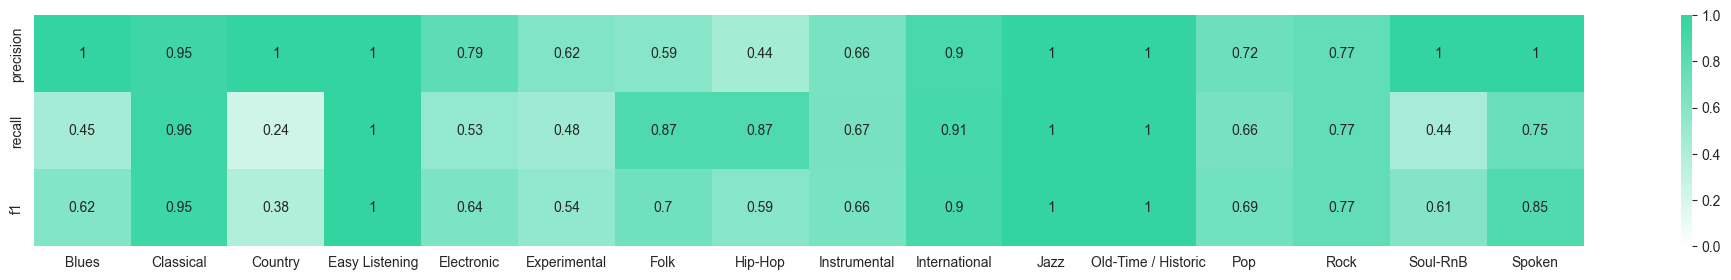

In [36]:
_, ax = plt.subplots(2, 1, figsize=(25, 3))
qda_spectral_original_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax, on_set='train')
qda_spectral_original_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax, on_set='test')
plt.subplots_adjust(hspace=0.5)
plt.show()

# 3. LDA Model Confidence

Next we will see how confident the model is when classifying a track, by using the predicted probabilities.

In [38]:
clf = lda_all_original_classifier.classifier
test_X = lda_all_original_classifier.dataset.test.X
test_y = lda_all_original_classifier.dataset.test.y

predicted_proba = pd.DataFrame(clf.predict_proba(test_X), columns=sorted(test_y.unique().tolist()), index=test_X.index)

# For each row, assign the column whose value for the predicted probability is the highest
predicted_proba['genre'] = predicted_proba.idxmax(axis=1)

Note that the figures below do not indicate that the model has classified the tracks correctly. Rather, they show the level of confidence the model has in its classification of the samples

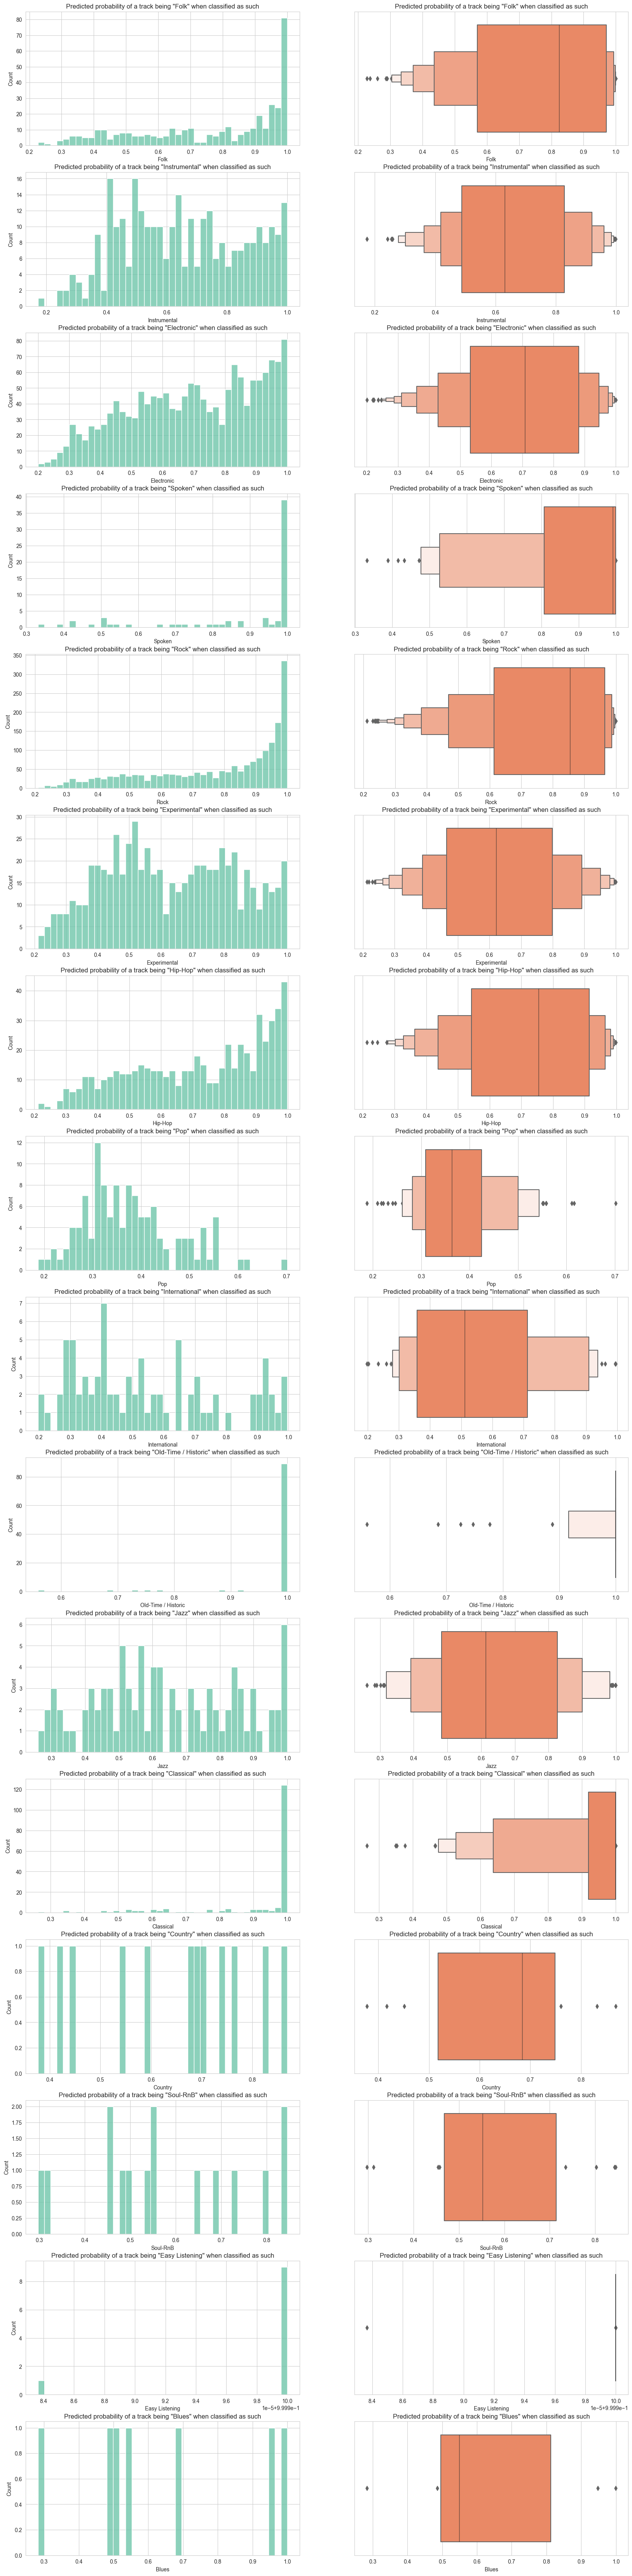

In [39]:
num_genres = predicted_proba['genre'].nunique()
ax_idxs = [(i, j) for i in range(num_genres) for j in range(2)]

fig, axs = plt.subplots(num_genres, 2, figsize=(20, 85))

k = 0
for genre in predicted_proba['genre'].unique():
    ax1_idx, ax2_idx = ax_idxs[k], ax_idxs[k + 1]
    ax1, ax2 = axs[ax1_idx[0]][ax1_idx[1]], axs[ax2_idx[0]][ax2_idx[1]]

    ax1.set_title(f'Predicted probability of a track being "{genre}" when classified as such')
    ax2.set_title(f'Predicted probability of a track being "{genre}" when classified as such')

    sns.histplot(x=predicted_proba[predicted_proba['genre'] == genre][genre], bins=40, ax=ax1)
    sns.boxenplot(x=predicted_proba[predicted_proba['genre'] == genre][genre], color='coral', ax=ax2)
    k += 2